## Week 5: Introduction to Statistics using Python (Part 1)

**This tutorial will be split into 3 parts:**

**1)** Descriptive statistics for single variable and multivariable datasets including measures of central tendency, variability and quantiles, along with the Central Limit Theorem and confidence interval for the mean.

**2)** Hypothesis testing in the form of 2-samples comparison (the t-test, non-parametric test) and correlation tests (parametric and non-parametric)

**3)** Linear regression analysis

**Before we start just a quick note on the layout of this document:**

Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Its uses include data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. So, for the purpose of this tutorial we are going to use Jupyter Notebook to learn how to carry out a basic statistical analysis using Python. 

As such throughout this notebook there are text sections providing explanations and instructions and code blocks where live code can be run and edited. In order to get the most out of these tutorials it is useful for you to mess around with the code to see what works and doesn't work, producing errors and learning how to fix them is the quickest way to learn! 

### Import Necessary Modules 

In order to complete this tutorial a number of python modules have to be imported/loaded. Modules in Python are simply Python files. A Python module can have a set of functions, classes or variables defined and implemented. These modules will help us to analyse the data. 

In [2]:
import numpy as np # For creating and analysing numpy arrays 
import pandas as pd # For creation of dataframes and associated operations
import seaborn as sns # Used for data visualisations
import matplotlib.pyplot as plt # Used for data visualisations
import scipy.stats as stats # For mode calculation 
import random # Get module containing seed function 
from collections import Counter # For counting 
import math # For functions

# Note if you need to install a Python module you can use pip which is the package installer for Python.
# i.e !pip install <Package Name> 

### Descriptive Statistics for One Variable  

After obtaining data, the first step should always be to carry out an exploratory analysis. This can be done by producing a number of descriptive measures for your data. In Python there are several basic functions that allow you to perform this exploratory analysis. So, we will start this tutorial by learning how to produce some simple descriptive statistics in Python.    

To begin we are going to discuss descriptive statistics for a single group or single random variable. As a reminder, a random variable is a variable whose value is the outcome of a random event, e.g. a random variable could be the outcome of the roll of a dice or the flip of a coin or the height of a male person in a population. Below we are going to generate some data to use.  

Note: The random.seed() method is used to initialize the random number generator which will help us generate our data. The random number generator needs a number to start with (a seed value), to be able to generate a random number. If you use the same seed value twice you will get the same random number twice. This can be used for reproducibility. 

In [3]:
# set seed (you can try changing the seed number to produce 
# different datasets)
np.random.seed(10) 

# We can begin our analysis by importing pre-generated data or by 
# generating our own data. We are going to create our own data in the 
# form of a numpy array. The data is going to be from a normal 
# distribution with a set of selected parameters. Parameters can be 
# preset as is the case in [1] or inputted directly 
# to the function as is the case in [2]. 

# [1] 
mu = 0.5
sigma = 1.2
size = 500

data_preset = np.random.normal(mu, sigma, size)

# [2]
data_input = np.random.normal(0.5, 1.2, 500)

# View the first 10 entries of our data. Note that index starts from 0 in Python.

print("Preset Data:", data_preset[0:10])
print("Input Data:", data_input[0:10])

data = np.round(data_input, 4) # Round our data to 4 decimal places for convenience.

Preset Data: [ 2.0979038   1.35833477 -1.35448035  0.48993938  1.24560317 -0.36410267
  0.8186139   0.63025823  0.50514972  0.29047975]
Input Data: [ 2.22710447  2.15857595  1.60558452 -0.18746467  2.03005892  0.10540155
  0.32439103  1.77012397  0.36670347  0.45334264]


One of the first things we can do to visually inspect our data is to plot the distribution of the variable. A distribution in statistics is a function that shows the possible values for a variable and how often they occur. 

We can look at the distribution of the data using a histogram or a density plot. We will start with a histogram.
A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. As you can see here the variable takes on both positive and negative values, and for each value (or interval of values) the height of the bar in the histogram represents the number of occurrences (counts) of such value in the data. 

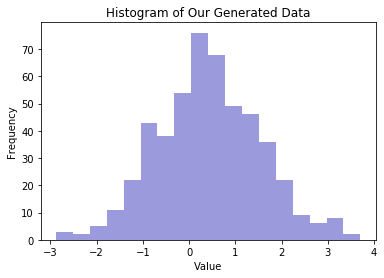

In [4]:
# We will use the Python modules seaborn and mathplotlib to carry 
# out most of the data visualisations seen throughout this tutorial.

sns.distplot(data, kde=False, color='#0504aa') # Plot histogram of data with specified colour
sns.set_style('darkgrid') # Change grid background 
plt.xlabel('Value') # x-axis label 
plt.ylabel('Frequency') # y-axis label 
plt.title('Histogram of Our Generated Data'); # Plot title

Apart from using a histogram, a density plot can also be used to examine the distribution of the data. A Density plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. On y-axis there are normalized counts. The sum of all probabilities in a distribution (area under density curve) is equal to 1. Note that kernel density estimation will not be covered in this document.

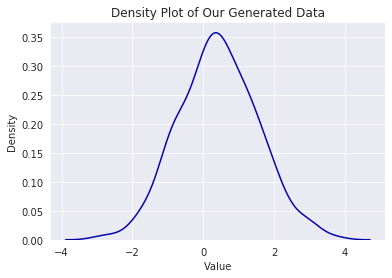

In [5]:
sns.kdeplot(data, color='#0504aa') # Plot density with specified colour
sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('Density Plot of Our Generated Data'); # Plot title

You can also produce plots that contain both the corresponding histogram and density plot. Note that if the seed number is changed, the generated dataset will change and so too will the histograms and density plots. 

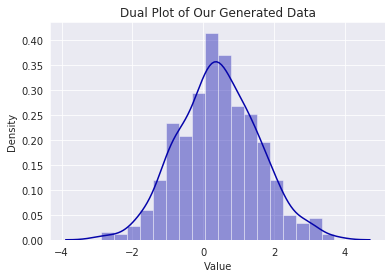

In [6]:
sns.distplot(data, color='#0504aa') # Plot density with specified colour
sns.set_style('darkgrid') # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('Dual Plot of Our Generated Data'); # Plot title

Another form of distribution is the Cumulative Distribution Function (CDF). The CDF of a random variable is another method to describe the distribution of random variables. The advantage of the CDF is that it can be defined for any kind of random variable (discrete, continuous, and mixed). CDF is the function F(x), which is equal to the probability that random variable X will take a value less than or equal to x: **F(x) = P(X <= x)**

The CDF is shown below in blue. Here we can see that as the value of x increases (goes to infinity), the value of F(x) approaches 1 (or equals 1). 

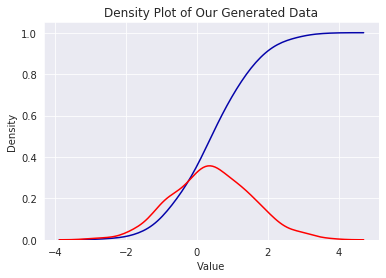

In [7]:
sns.kdeplot(data, color='#0504aa', cumulative=True) # Plot cumulative density with specified colour (blue)
sns.kdeplot(data, color='r') # Plot density with specified colour (red)
sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('Density Plot of Our Generated Data'); # Plot title

### Measures of Central Tendency   

After visually inspecting your data the next question is how would you describe your data numerically? What first comes to your mind? Generally, you'll want to calculate some summary measures that reflect the 'middle' or the 'average' value of your data. This allows you to get a feel for what's going on in your data. These numerical summaries are termed measures of central tendency, that is the tendency for the values of a random variable to cluster round its mean, mode, or median. 

#### 1) The Mean 
The mean (or average) of a set of data values is the sum of all of the data values divided by the number of data values.

In [8]:
# 1) The Mean (without missing/Nan values)

np.mean(data)

0.427853

In [9]:
# 2) The Mean (with missing/Nan values)

data_with_Nan = np.append(data, math.nan) # Add an Nan value to data

np.mean(data_with_Nan)

# As you can see computing the mean with missing/Nan values returns Nan. This is important and data 
# should always be examined for missing values before analysis is carried out.

nan

In [10]:
# 3) The Mean (Ignore /missing/Nan values in calculation of mean)

np.nanmean(data_with_Nan)

0.427853

#### 2) The Median 
The median is the number that is halfway into the set i.e. the middle number.

In [11]:
# 1) The Median (Without missing/Nan values)

np.median(data)

0.4037

In [46]:
# 2) The Median (With missing/Nan values)

np.median(data_with_Nan)

# As you can see computing the median with missing/Nan values returns 
# Nan. This is important and data should always be examined for 
# missing values before analysis is carried out.  

nan

In [13]:
# 3) The Median (Ignore missing/Nan values in calculation of median)

np.nanmedian(data_with_Nan)

0.4037

#### 3) The Mode: 
The mode is the most frequent value in the dataset. As the Python module numpy does not supply a mode function we also have to import stats from the scipy module. Note if there is more than one such value (mode), only the smallest is returned.

In [14]:
print(stats.mode(data)) # Gives array of modal values first followed by array of counts for each mode.
# i.e modal value is 0.1464 and it appears/is counted twice.

# We can tidy this up using print statements 
print("Mode of dataset:", stats.mode(data)[0]) # Remember index starts at 0
print("Number of times", stats.mode(data)[0], "appears in dataset:", stats.mode(data)[1])

ModeResult(mode=array([0.1464]), count=array([2]))
Mode of dataset: [0.1464]
Number of times [0.1464] appears in dataset: [2]


In [15]:
# To show the concept of mode in a simpler fashion we have toy example: 
x = [1,1,1,2,3,4,6,18]
stats.mode(x)

ModeResult(mode=array([1]), count=array([3]))

In [16]:
# So overall we have: 
print("Mean: ", np.mean(data))
print("Median: ", np.median(data))
print("Mode: ", stats.mode(data)[0]) 

# Remember if there is more than mode, only the smallest is returned

Mean:  0.427853
Median:  0.4037
Mode:  [0.1464]


###  Visualise Measures of Central Tendency 

These measures are shown on the plot below where the mean is in red, median is in blue and mode is in green.

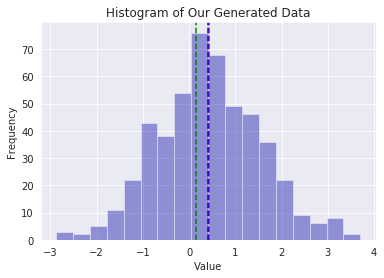

In [17]:
sns.distplot(data, kde=False, color='#0504aa') # Plot histogram with specified color 
sns.set_style('darkgrid') # Change grid background 

plt.xlabel('Value') # x-axis label 
plt.ylabel('Frequency') # y-axis label 
plt.title('Histogram of Our Generated Data'); # Plot title

# Add mean, median and modal lines
plt.axvline(np.mean(data),color='r', linestyle='--') # mean line
plt.axvline(np.median(data),color='b', linestyle='--') # median line
plt.axvline(float(stats.mode(data)[0]), color='g', linestyle='--'); # mode line 

### Variability 

Another aspect of the data that you may be interested in is the spread of the data or what are the highest and lowest values. There are many ways to describe the variability of the data. Perhaps the most basic measure is the range, the difference between the minimum and maximum values of the data. However, the range is not the only way to describe variability of your data. Other measures include the variance and standard deviation. 

#### 1) Range of the Data
The range of a set of data is the difference between the highest and lowest values in the set.

In [18]:
min_val = min(data) # get smallest value 
max_val = max(data) # get highest value

range_of_data = [min_val, max_val]
print("Lowest and highest values:", range_of_data)

# So the values in our dataset go from -2.8792 and 3.706. Therefore the range of our data is 6.5852
print("Range of Data:", range_of_data[1]-range_of_data[0])

Lowest and highest values: [-2.8792, 3.706]
Range of Data: 6.5852


#### 2) Variance of the Data

Variance measures how far a set of numbers are spread out from their average value. It is the average of the squared differences from the mean.

In [19]:
np.var(data)

1.240315315411

#### 3) Standard Deviation of the data 

Standard deviation (SD) is the square root of variance and therefore also measures the spread of the data. Like variance, a low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

In [20]:
np.std(data)

1.1136944443656887

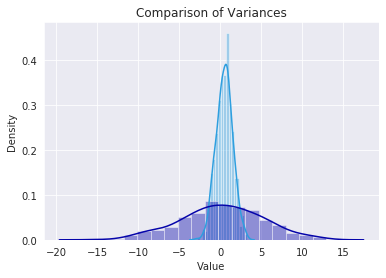

In [21]:
# Data with a higher variance/SD means that distribution will be 
# more spread out and therefore look flatter. 
# This is shown in the plot below.

# Set up parameters 
mu = 0.5
sigma_low = 1
sigma_high = 5
size = 500

data_low_var = np.random.normal(mu, sigma_low, size) # create data with low SD/var
data_high_var = np.random.normal(mu, sigma_high, size) # create data with high SD/var

sns.set_style('darkgrid')
sns.distplot(data_low_var, color='#2E9FDF') # light blue
sns.distplot(data_high_var, color='#0504aa') # dark blue

plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('Comparison of Variances'); # Plot title

### Splitting Data using Quartiles and Percentiles

Sometimes we would like to split our data into n equal splits. For example, if we want to split our data into 4 equal sized groups each containing 25% of the total observations we use 3 points to divide the dataset. These 3 points are the lower quartile (Q1), middle quartile (median, Q2) and upper quartile (Q3). Generally, the data is arranged from smallest to largest:

**1)** First Group (0 -> Q1): the lowest 25% of numbers

**2)** Second Group (Q1 -> Q2): between 25.1% and 50% (up to the median)

**3)** Third Group (Q2 -> Q3): 51% to 75% (above the median)

**4)** Fourth Group (Q3 -> Total): the highest 25% of numbers

Here we show how to split our data in 4 equal sized groups using quartiles. However, you can choose any number of groups to split your data into. An example of this is when we want to split our data into 100 equal groups using percentiles. In this case the 5th percentile is the boundary between the smallest 5% of the data and the largest 95% of the data. The median of a dataset is the 50th percentile of the dataset. The 25th percentile is the first quartile, and the 75th percentile the third quartile.

Let's look at an example:

In [22]:
# Generate 22 observations with replacement from values 1 to 10 inclusive
np.random.seed(124)

data_2 = np.random.randint(low=1, high=11, size=24)
print("data_2:", data_2)

data_2: [ 2  8  3 10  1  5  5  6  6  7 10  7  1  9 10 10  1  3  3  2  2 10  2 10]


When using a numpy array in Python you can simply use the in-built function .quantile to split your data into segments:

In [23]:
# Here we split our data in 4 
# This gives you the 0th, 25th, 50th, 75th and 100th percentiles

print("data array : ", data_2)  
print("0%: ", np.quantile(data_2, 0)) 
print("25% : ", np.quantile(data_2, .25)) # Q1
print("50% : ", np.quantile(data_2, .50)) # Q2
print("75% : ", np.quantile(data_2, .75)) # Q3 
print("100% : ", np.quantile(data_2, 1)) 

# you can also change the percentile value to choose which 
# precentile you want.
print("23rd percentile:", np.quantile(data_2, 0.23))

data array :  [ 2  8  3 10  1  5  5  6  6  7 10  7  1  9 10 10  1  3  3  2  2 10  2 10]
0%:  1
25% :  2.0
50% :  5.5
75% :  9.25
100% :  10
23rd percentile: 2.0


Let's try to visualise this, we are going to use another type of plot, a dotplot, which is similar to a histogram but instead of bars the values are represented as points. In this plot the lower quartile is displayed in red, the middle quartile is displayed in blue and the upper quartile is displayed in green. 

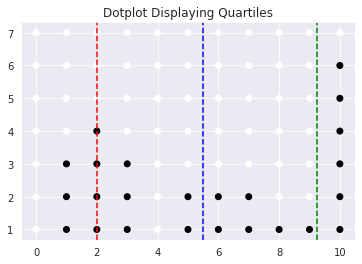

In [24]:
# Set up plot variables 
bins = np.arange(12)-0.5
hist, edges = np.histogram(data_2, bins=bins)

# Make plot grid
y = np.arange(1,hist.max()+2)
x = np.arange(11)
X,Y = np.meshgrid(x,y)

# Plot 
plt.scatter(X,Y, c=Y<=hist, cmap="Greys")

# Include quantile lines
plt.axvline(np.quantile(data_2, .25),color='r', linestyle='--') # Q1
plt.axvline(np.quantile(data_2, .5),color='b', linestyle='--') # Q2
plt.axvline(np.quantile(data_2, .75), color='g', linestyle='--') # Q3
plt.title("Dotplot Displaying Quartiles"); # Plot title

Let's look at another example, this time using a continuous distribution. On a plot you can see that Q1, Q2 and Q3 denoted by blue lines divide data into 4 intervals with equal probabilities (25% each):

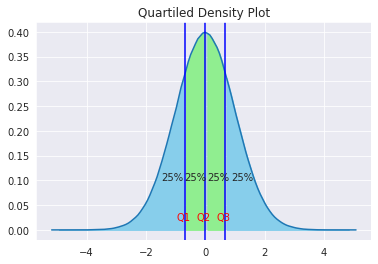

In [25]:
# Generate continuous distribution (data from a normal distribution)
np.random.seed(12)

mu = 0
sigma = 1
size = 1000000

data = np.random.normal(mu, sigma, size)

# Plot data 
points = sns.kdeplot(data, shade=True).get_lines()[0].get_data()

x = points[0]
y = points[1]

# Get quartile values 
Q1 = np.quantile(data, .25) 
Q2 = np.quantile(data, .50) 
Q3 = np.quantile(data, .75) 

# Plot quartile lines and shade density plot 
plt.axvline(Q1, color='b', linestyle='-')
plt.axvline(Q2, color='b', linestyle='-')
plt.axvline(Q3, color='b', linestyle='-')

plt.fill_between(x,y, where = (x >= np.min(data)) & (x<=Q1), color='skyblue')
plt.fill_between(x,y, where = (x >= Q1) & (x<=Q2), color='lightgreen')
plt.fill_between(x,y, where = (x>=Q2) & (x<=Q3), color='lightgreen')
plt.fill_between(x,y, where = (x>=Q3) & (x<=np.max(data)), color='skyblue')

# Annotate plot with quartile names and percentages 
plt.text(Q1-0.3,0.02,'Q1', color="r")
plt.text(Q2-0.3,0.02,'Q2', color="r")
plt.text(Q3-0.3,0.02,'Q3', color="r")

plt.text(Q1-0.8,0.1,'25%')
plt.text(Q2-0.7,0.1,'25%')
plt.text(Q3-0.6,0.1,'25%')
plt.text(Q3+0.2,0.1,'25%')

plt.title("Quartiled Density Plot"); # Plot title

This leads us onto our next data visualisation. Quartiles are utilised in boxplots which is a method for graphically depicting groups of numerical data through their quartiles. In other words, a boxplot is a standardized way of displaying the distribution of data based on a five-number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

In a boxplot the lower boundary of the box is Q1, the middle is the median or Q2 and the upper boundary is Q3. The interquartile range is denoted by Q3 - Q1 which is another popular measure of variability. The higher the height of the box (IQR = Q3 - Q1), the higher variability of the data.

Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles. The upper dashed line ends at Q3 + 1.5 * IQR and lower dashed line ends at Q1 - 1.5 * IQR. All values above and below these boundaries are considered to be outliers i.e. extremely high and low values.

In [26]:
# Lets create an annotated boxplot (Set up function to produce annotated boxplot)

def annotate_boxplot(bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):
    """Annotates a matplotlib boxplot with labels marking various centile levels.

    Parameters:
    - bpdict: The dict returned from the matplotlib `boxplot` function. If you're using pandas you can
    get this dict by setting `return_type='dict'` when calling `df.boxplot()`.
    - annotate_params: Extra parameters for the plt.annotate function. The default setting uses standard arrows
    and offsets the text based on other parameters passed to the function
    - x_offset: The offset from the centre of the boxplot to place the heads of the arrows, in x axis
    units (normally just 0-n for n boxplots). Values between around -0.15 and 0.15 seem to work well
    - x_loc: The x axis location of the boxplot to annotate. Usually just the number of the boxplot, counting
    from the left and starting at zero.
    text_offset_x: The x offset from the arrow head location to place the associated text, in 'figure points' units
    text_offset_y: The y offset from the arrow head location to place the associated text, in 'figure points' units
    """
    
    if annotate_params is None:
        annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.annotate('Q2 or Median', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('Q1 or 25%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('Q3 or 75%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
    plt.annotate('Q3 - 1.5 * IQR', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
    plt.annotate('Q3 + 1.5 * IQR', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)

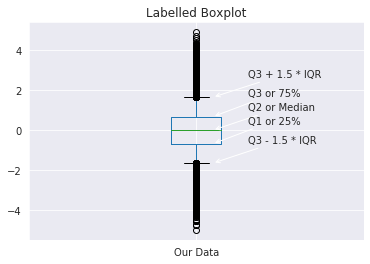

In [27]:
df = pd.DataFrame({'Our Data': data}) # Our data

bpdict = df.boxplot(whis=[5, 95], return_type='dict')
annotate_boxplot(bpdict)
plt.title("Labelled Boxplot"); # Plot title

Now let's see how the density plot and boxplot shown above relate to each other. 

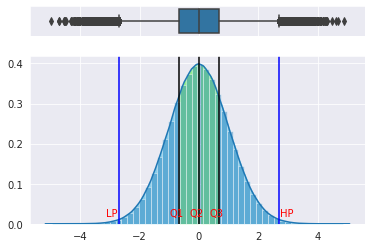

In [28]:
# Show boxplot points in density plot

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(data, ax=ax_box)
sns.distplot(data, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# 5-point summary calculation 
Q1 = np.quantile(data, .25) 
Q2 = np.quantile(data, .50) 
Q3 = np.quantile(data, .75) 
IQR = Q3 - Q1
LP = Q1 - 1.5*IQR
HP = Q3 + 1.5*IQR

# Add marker lines 
plt.axvline(LP,color='b', linestyle='-')
plt.axvline(HP,color='b', linestyle='-')
plt.axvline(Q1, color='black', linestyle='-')
plt.axvline(Q2, color='black', linestyle='-')
plt.axvline(Q3, color='black', linestyle='-')

# Shade graph
plt.fill_between(x,y, where = (x >= np.min(data)) & (x<=Q1), color='skyblue')
plt.fill_between(x,y, where = (x >= Q1) & (x<=Q2), color='lightgreen')
plt.fill_between(x,y, where = (x>=Q2) & (x<=Q3), color='lightgreen')
plt.fill_between(x,y, where = (x>=Q3) & (x<=np.max(data)), color='skyblue')

# Annotate 
plt.text(Q1-0.3,0.02,'Q1', color="r")
plt.text(Q2-0.3,0.02,'Q2', color="r")
plt.text(Q3-0.3,0.02,'Q3', color="r")
plt.text(LP-0.42, 0.02, 'LP', color="r")
plt.text(HP+0.02, 0.02,'HP', color="r");

### Descriptive Statistics for a Dataframe

Before now we have learned how to describe the distribution of one variable and produce descriptive statistics for that data including measures of central tendency (mean, median, mode), measures of variability (range, interquartile range, variance, standard deviation) and quantiles (quartiles, percentiles). By working through the notebook you have also become aware of some basic visualization methods that are used to 'get a feel for the data' including histograms, density plots and boxplots.  

Let's move from describing a one variable dataset to describing multiple variable datasets that are combined into data frames. We are going to use the pandas module in order to create and analyse our multiple variable data. It is important to note that categorical variables can't have a mean or median (those metrics work for numeric variables only). So, for the purpose of this tutorial we will remove them from data frame before applying functions for descriptive statistics.  

In [29]:
# Generate some random dataframe
Group = ["A", "B", "C", "D", "D"]

np.random.seed(12)

df = pd.DataFrame(dict(
    var1=np.random.randint(0, 100, size=100),
    var2=np.random.randint(0, 100, size=100),
    var3=np.random.randint(0, 100, size=100),
    Group=np.random.choice(list(Group), 100)))

df.head()

,var1,var2,var3,Group
0,75,68,89,C
1,27,25,93,C
2,6,44,30,C
3,2,22,19,D
4,3,69,66,A


Again, we can generate some visualisations to get a feel for our data. Let's take a look at the distribution of column 4, the groups, and also let’s see how the distribution of our values varies between our groups. 

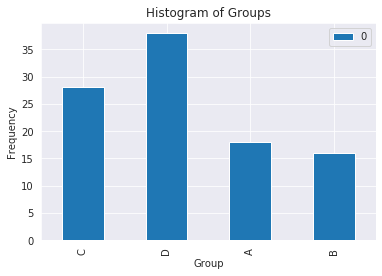

In [30]:
# Let's look at how many observations in each group. 
letter_counts = Counter(df.iloc[:,3])
df1 = pd.DataFrame.from_dict(letter_counts, orient='index')
df1.plot(kind='bar')

plt.title("Histogram of Groups") # Plot title
plt.xlabel('Group') # x-axis label 
plt.ylabel('Frequency'); # y-axis label  

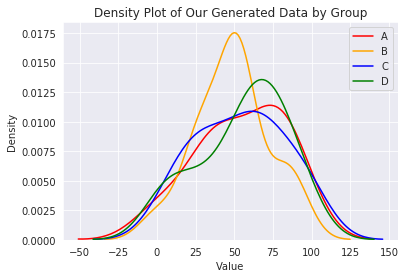

In [31]:
# Sort the dataframe by Group
Group_A = df.loc[df['Group'] == "A"]
Group_B = df.loc[df['Group'] == "B"]
Group_C = df.loc[df['Group'] == "C"]
Group_D = df.loc[df['Group'] == "D"]

# Plot density plot by Group
sns.distplot(Group_A.iloc[:,0], hist=False, rug=False, color="r", label="A")
sns.distplot(Group_B.iloc[:,0], hist=False, rug=False, color="orange", label="B")
sns.distplot(Group_C.iloc[:,0], hist=False, rug=False, color="b", label="C")
sns.distplot(Group_D.iloc[:,0], hist=False, rug=False, color="g", label="D")

# Appearance 
sns.set_style('darkgrid') # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('Density Plot of Our Generated Data by Group'); # Plot title

In [32]:
# Let's move onto descriptive statistics for dataframes 
# Remove the categorical group variables in order to obtain 
# descriptive statistics for the numerical variables 

df_num = df.iloc[:,0:3]
df_num.head()

,var1,var2,var3
0,75,68,89
1,27,25,93
2,6,44,30
3,2,22,19
4,3,69,66


In [33]:
# Descriptive statistics obtained for columns containing variables 
# 1,2 and 3:

summary = df_num.describe(include= 'all')
summary = summary.transpose()

summary

# Like in the previous section we obtain descriptive statistics for 
# each variable (this time using the .describe function), these 
# measures should be familiar to you now. 

,count,mean,std,min,25%,50%,75%,max
var1,100.0,53.64,27.422442,0.0,32.75,56.0,75.00,99.0
var2,100.0,47.19,27.884573,0.0,22.00,44.0,71.25,97.0
var3,100.0,54.93,27.229758,1.0,32.00,55.5,77.75,98.0


In [34]:
# Descriptive statistics can also be obtained for groups 
# (A, B, C and D):

df_group1 = df.iloc[:,0:4]
summary = df_group1.groupby('Group').describe(include= 'all')
summary.transpose().head(8)

# This shows the descriptive statistics for variable 1 for each group 
# (Only variable 1 is shown here - remove .head(8) to view entire results)

Group               A          B          C          D
var1 count  18.000000  16.000000  28.000000  38.000000
     mean   54.555556  48.500000  53.678571  55.342105
     std    28.494008  23.765521  28.679653  28.196488
     min     0.000000   0.000000   6.000000   2.000000
     25%    35.500000  31.500000  29.750000  34.750000
     50%    58.500000  51.000000  57.500000  59.500000
     75%    75.500000  56.500000  75.000000  75.000000
     max    89.000000  91.000000  99.000000  97.000000

## Some Things to Remember:
### Probability Distributions 

A probability distribution is a function that describes the likelihood of obtaining the possible values that a random variable can assume. In other words, the values of the variable vary based on the underlying probability distribution. For example, suppose you draw a random sample and measure the heights of the subjects. As you measure heights, you can create a distribution of heights. This type of distribution is useful when you need to know which outcomes are most likely, the spread of potential values, and the likelihood of different results. 

There are some basic distributions that you definitely need to remember. As probability distributions describe the dispersion of the values of a random variable, the kind of variable determines the type of probability distribution. For a single random variable distributions can be discrete or continuous and are represented as a function with parameters.

A discrete distribution is a statistical distribution that shows the probabilities of outcomes with finite values.
For example, coin tosses and counts of events are discrete functions. These are discrete distributions because there are no in-between values. Discrete distributions then are those for which list of outcomes is countable (e.g. only 2 sides of coin, only 6 sides of dice, number of clients visiting a website, etc.). They can be described by Probability Mass Function (PMF). PMF is a function that gives the probability that a discrete random variable is exactly equal to some value. For discrete probability distribution functions, each possible value has a non-zero likelihood. Furthermore, the probabilities for all possible values must sum to one. Because the total probability is 1, one of the values must occur for each opportunity. For example, the likelihood of rolling a specific number on a die is 1/6. The total probability for all six values equals one. When you roll a die, you inevitably obtain one of the possible values.

A continuous distribution is built from outcomes that potentially have infinite measurable values between two variables. Continuous distributions then are those for which list of outcomes is uncountable, e.g. height of women in a population of South Africa, size of tumor in immunodeficient mice, expected project time completion, etc. Probability Density Function (PDF) is used to describe them. PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. The integral of a PDF gives the probability that a random variable falls within some interval. Unlike discrete probability distributions where each particular value has a non-zero likelihood, specific values in continuous distributions have a zero probability. For example, the likelihood of measuring a temperature that is exactly 32 degrees is zero.

Sum of all probabilities in PMF as well as area under PDF curve (or intergral) are equal to 1 (this is a part of density function definition).

Every distribution in Python has four types of functions:

**.cdf** gives the cumulative distribution function (CDF)

**.ppf** for percent point function (inverse of cdf) at q of the given random variable (values that partition a distribution into q intervals of equal probability)

**.pmf** for probability mass function at k of the given random variable (probability density function, PDF or probability mass function, PMF)

**.rvs** for random, a random variable having the specified distribution (basically, it is used for sampling from distribution)

####  Discrete Distributions
##### 1) Bernoulli Distribution

The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by n=0 and n=1 in which n=1 ("success") occurs with probability p and n=0 ("failure") occurs with probability q = 1-p, where 0<p<1. In other words, think of Bernoulli as a single coin flip, with probability of success p the coin will land heads (or tails, whatever you like) and probability of failure q = 1-p. X is the random variable defining the outcome of the coin flip, and it will follow a Bernoulli distribution.

**X ~ Bern(p, p(1-p))**

where p is the probabilty of success. 

There are only 2 outcomes: success and failure, so this distribution is characterized by a probability mass function. To recap, a probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value. All discrete distributions (e.g. Binomial and Poisson) have a PMF. 

**Examples of events which follow Bernoulli distribution:**

* If a team will win a championship or not. 
* Whether a student will pass or fail an exam (success, if student is well-prepared, p = 0.8) or fail an exam (failure, q = 1-p = 0.2).
* A rolled dice will either show a 6 (success, if dice is fair, p=1/6) or any other number (failure, q = 1-1/6 = 5/6).
* Flipping a coin and you will win if the output is tail (if coin is fair, p = q = 0.5).

#### Example of Bernoulli Distribution: 

![Bernoulli](Images/bernoulli.png)

##### 2) Binomial distribution

Binomial distributions can be presented as multiple independent Bernoulli trials, each with probability of success p. It reflects the probability of observing X successes in n independent Bernoulli trials with the probability of success p (independence means that none of the trials have an effect on the probability of the next trial).

The random variable X defining the number of successes in n trials, will follow a Binomial distribution:

**X ~ Binom(n,p)**

where n is the number of trials and p is the probability of success (mean is np, variance is np(1-p)).

**Examples of events (variables) which follow Binomial distribution:**

* There are n clinical trials of a new drug. What the probability of observing X events of curing the disease (successes) if the probability of success in one trial is equal to p.
* Coin Example: if we flip that coin 5 times and coin is unfair this time (p = 0.8 for getting tails), what is the probability of having the situation with 3 heads and 2 tails?

Probability of 6 successes: 0.00021810698510587497
[1.62716605e-09 3.60688475e-08 5.04963865e-07 5.00755833e-06
 3.73897689e-05 2.18106985e-04 1.01783260e-03 3.85928193e-03
 1.20066549e-02 3.08170809e-02 6.53695655e-02 1.14396740e-01
 1.64261985e-01 1.91638983e-01 1.78863051e-01 1.30420974e-01
 7.16036722e-02 2.78458725e-02 6.83933711e-03]
Sum of Probabilities: 0.9999999999651297
Generated Sample: [3 2 5 2 3]
Probability that number of success <= 9: 0.9998951424
40% percent of the data have values less than: 7.0


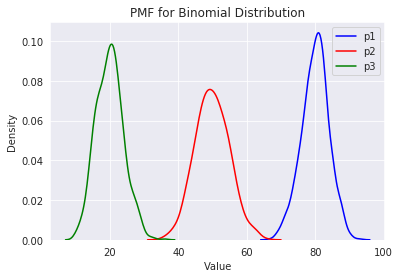

In [35]:
# The function .pmf is used to generate the probabilities of observing a specified
# number of successes. 
# What is the probability of observing 6 successes in a trial where 
# the total number of participants is 20 and the probability (p) of 
# success is 0.7? 
print("Probability of 6 successes:", stats.binom.pmf(6, 20, 0.7))

# Also using .pmf, we can create a vector of probabilities for 
# all possible values of variable: 
print(stats.binom.pmf(list(range(1, 20)), 20, 0.7))

# Here we show that the sum of all probabilities in the above vector 
# should be equal to 1 
print("Sum of Probabilities:", sum(stats.binom.pmf(list(range(1, 21)), 20, 0.7)))

# Now we can use .rvs in order to generate a sample from binomial 
# distribution where the number of trials is 10, the size of sample 
# we take is 5 and the probability of success is 0.4. 
print("Generated Sample:", stats.binom.rvs(10, 0.4, size=5))

# .cdf can be used to give us the probability that random variable X 
# (number of successes) will take a value less than or equal to  
# (in this case), when number of trials is equal to size = 10 
# and probability of success is equal to prob = 0.4
print("Probability that number of success <= 9:", stats.binom.cdf(9, 10, 0.4))

# .ppf is used to calculate quantile: the 40% percentile or 0.4 
# quantile indicates the point where 40% percent of the data have 
# values less than this number when number of trials is size = 20 
# and probability of success is prob = 0.4. 
print("40% percent of the data have values less than:", stats.binom.ppf(q = 0.4, n = 20, p = 0.4))

# Now lets see what effect different parameters have on the 
# distribution.

# We create a dataframe with columns of binomial data and plot it to 
# compare these distributions with different parameters 
np.random.seed(123)
    
binomial_df = pd.DataFrame(dict(p1=stats.binom.rvs(100, 0.8, size=1000),
    p2=stats.binom.rvs(100, 0.5, size=1000),
    p3=stats.binom.rvs(100, 0.2, size=1000)))

sns.kdeplot(binomial_df.iloc[:,0], color='b') # Plot density 
sns.kdeplot(binomial_df.iloc[:,1], color='r') # Plot density
sns.kdeplot(binomial_df.iloc[:,2], color='g') # Plot density

sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('PMF for Binomial Distribution'); # Plot title

##### 3) Poisson

The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period. A Poisson process is therefore a model for a series of discrete events where the average time between events is known (it denotes as λ), but the exact timing of events is random. The arrival of an event is independent of the event before and two events cannot occur at the same time. Poisson processes are generally associated with time, but they do not have to be. Important to mention that Poisson distribution is used to describe the distribution of rare events in a large population.

**X ~ Pois(λ)**

where λ is the expected number of events in the time interval. λ is both the mean and the variance. 

**Examples of Poisson distributions:**

* What the probability of waiting for a bus for 1 year if the average waiting time is 20 minutes? This example is frequently used to describe Poisson process, however, in real life, buses have schedule and the arrivals are not independent of one another.

* Poisson process can model not only time: the average number of visitors to a website is equal to 1000 per day, what the probability that on the next day there will be 1102 visitors? 1 visitor?

Probability of observing 21 units: 0.08460506418293791
Generated Sample: [2 2 0 3 3 0 2 2 1 2]
Probability that number of success <= 3: 0.2650259152973616
25% percent of the data have values less than: 15.0


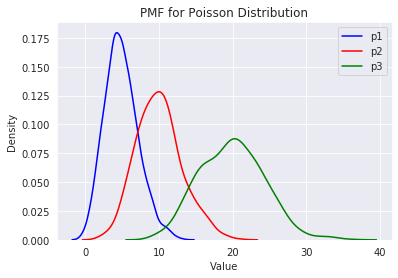

In [36]:
# What is the probability of observing 21 units if lambda = 20 units
print("Probability of observing 21 units:", stats.poisson.pmf(k = 21, mu = 20))

# Now we can use .rvs in order to generate a sample from the poisson 
# distribution with lambda = 1
print("Generated Sample:", stats.poisson.rvs(mu = 1, size=10))

# .cdf can be used to give us the probability that random variable X 
# distributed by Poisson with lambda 5 
# will take a value less than or equal to  3 (in this case)
print("Probability that number of success <= 3:", stats.poisson.cdf(k=3, mu=5))

# quantile: lower quartile for Poisson distribution with lambda 18, 
# the lower quartile indicates the point where 25% percent of the data have values less 
# than this number
print("25% percent of the data have values less than:", stats.poisson.ppf(q = 0.25, mu=18))


# Plot Poisson Distributions with different parameters
np.random.seed(123)

poisson_df = pd.DataFrame(dict(p1=stats.poisson.rvs(mu = 5, size=1000),
    p2=stats.poisson.rvs(mu = 10, size=1000),
    p3=stats.poisson.rvs(mu = 20, size=1000)))

sns.kdeplot(poisson_df.iloc[:,0], color='b') # Plot density 
sns.kdeplot(poisson_df.iloc[:,1], color='r') # Plot density
sns.kdeplot(poisson_df.iloc[:,2], color='g') # Plot density

sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('PMF for Poisson Distribution'); # Plot title

#### Continuous Distributions
##### 1) Uniform Distribution 

The continuous uniform distribution or rectangular distribution is a family of symmetric probability distributions. The Uniform distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds: parameters, a and b, which are the minimum and maximum values. It models the situation when events that are equally likely to occur.

**X ~ U(a,b)**

where a and b are minimum and maximum values. (a+b)/2 is mean and variance is (1/12)*(b-a)^2.

**Examples of Uniform distributions:**

* If you choose a card in a deck of unique cards (e.g. 52 cards in total where they all are equally likely to be pciked i.e. 1/52).

* Perfect random number generators have outcomes that are equally likely.

* Probability of guessing exact time at any moment (outcomes should be equally likely, so you probably have to sit in a dark room for a while to make sure that you have no idea whether it's morning or evening).

X=4 0.1111111111111111
Generated Sample: [8.30263264 5.0298782  6.6497109  8.93708926 6.98567272]
Probability takes value <= 7: 0.6666666666666666
50% percent of the data have values less than: 5.5


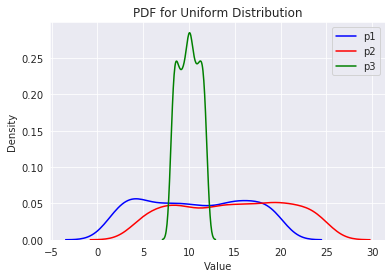

In [37]:
# The function .pdf is used to give the value of density function for X=4, 
# uniform distribution with parameters a=min=1 and b=max=10

print("X=4", stats.uniform.pdf(9, loc=1,  scale=9)) # [loc, loc + scale]

# Now we can use .rvs in order to generate a sample from a uniform distribution
# with parameters a=min=1 and b=max=10
np.random.seed(134)
print("Generated Sample:", stats.uniform.rvs(size=5, loc=1, scale=9))

# .cdf can be used to give us the probability that gives you probability that random 
# variable X distributed uniformly with parameters a=min=1 and b=max=10 will take a value less 
# than or equal to q = 7
print("Probability takes value <= 7:", stats.uniform.cdf(7, loc=1, scale=9))

# .ppf is used to calculate quantile: quantile 0.5 (50% or median) indicates the 
# point where 50% percent of the data have values less than this number
print("50% percent of the data have values less than:", stats.uniform.ppf(q = 0.5, loc=1, scale=9))
    
# Let's plot PDF for different parameters of the Uniform distribution

uniform_df = pd.DataFrame(dict(p1=stats.uniform.rvs(loc=1, scale=19, size=1000),
p2=stats.uniform.rvs(loc=4, scale=21, size=1000),
p3=stats.uniform.rvs(loc=8, scale=4, size=1000)))

sns.kdeplot(uniform_df.iloc[:,0], color='b') # Plot density 
sns.kdeplot(uniform_df.iloc[:,1], color='r') # Plot density
sns.kdeplot(uniform_df.iloc[:,2], color='g') # Plot density

sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('PDF for Uniform Distribution'); # Plot title
    

##### 2) Normal Distribution

The normal distribution is probably the most common distribution in all of probability and statistics. It is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. Only mean and the standard deviation is required to explain the entire distribution. Mean, median and mode are all equal.

**X ~ N(μ, σ^2)**

where μ is the mean and σ^2 is the standard deviation

**Examples of normally distributed measurments:**

* Height or weight of animals
* Blood pressure
* Travel time for employees

X=10: 7.69459862670642e-23
Generated Sample: [ 0.68895827 -1.8017689  -0.66571689  0.67696843 -0.9846491   0.72071943]
Probability takes value <= 3: 0.9986501019683699
20% percent of the data have values less than: -0.8416212335729142


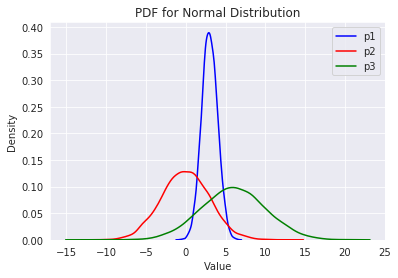

In [38]:
# The function .pdf is used to give the value of density function for X=10, 
# normal distribution with parameters mean = 0 and sd = 1
print("X=10:", stats.norm.pdf(10, loc=0,  scale=1)) # loc = mean, scale = sd
#7.694599e-23

# Now we can use .rvs in order to generate a sample from a normal distribution
# with parameters mean = 0 and sd = 1
print("Generated Sample:", stats.norm.rvs(size=6, loc=0, scale=1))

# .cdf can be used to give us the probability that gives you probability that random 
# variable X distributed normally with parameters mean = 0 and sd = 1 will take a value less 
# than or equal to q = 3
print("Probability takes value <= 3:", stats.norm.cdf(3, loc=0, scale=1))

# .ppf is used to calculate quantile: 0.2 quantile indicates the point where 20% percent of the 
# data have values less than this number
print("20% percent of the data have values less than:", stats.norm.ppf(q = 0.2, loc=0, scale=1))

# Let's plot PDF for different parameters of normal distribution

normal_df = pd.DataFrame(dict(p1=stats.norm.rvs(loc=3, scale=1, size=10000),
    p2=stats.norm.rvs(loc=0, scale=3, size=10000),
    p3=stats.norm.rvs(loc=6, scale=4, size=10000)))

sns.kdeplot(normal_df.iloc[:,0], color='b') # Plot density 
sns.kdeplot(normal_df.iloc[:,1], color='r') # Plot density
sns.kdeplot(normal_df.iloc[:,2], color='g') # Plot density

sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('PDF for Normal Distribution'); # Plot title

There is an important empirical rule about normal distribution:

* Approximately 68% percent of the data fall within 1 standard deviation of the mean
* Approximately 95% of the data fall within 2 standard deviations of the mean
* Approximately 99.7% of the data fall within 3 standard deviations of the mean

This is shown below: 
![Normal Distribution](Images/stddev.png)

##### 3) Student T distribution

The T distribution is another distribution which is widely utilized in statistics tests (e.g. Student's t-test, confidence intervals, linear regression analysis). It looks almost identical to the normal distribution curve, but it has heavier tails, which means that it contains more values that fall far from its mean. The t distribution is used instead of the normal distribution when you have small samples (e.g. in confidence intervals of the mean). The larger the sample size, the more the t distribution looks like the normal distribution.

**X ~ T(df)**

where df is the degrees of freedom. df = n - 1 where n is the number of independent observations in sample.

X=1: 0.23574057970529028
Generated Sample: [-1.02983689  0.94276521 -1.18552877 -2.76237167 -0.79369747 -1.49984952
 -0.07503965  0.53238602 -0.7248572  -1.99799094]
Probability takes value <= 2: 0.9699989818069508
20% percent of the data have values less than: -0.8609505502689286


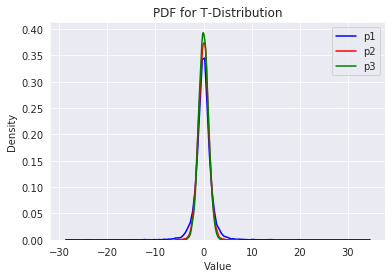

In [39]:
# Gives the value of density function for X=1, T-distribution with n=20, df=n-1=19
print("X=1:", stats.t.pdf(x=1, df=19))

# Generates values from T-distribution with parameters df=n-1=19
print("Generated Sample:", stats.t.rvs(df=19, size=10))

# Gives you probability that random variable X t-distributed df=19 will take a value less 
# than or equal to q = 2
print("Probability takes value <= 2:", stats.t.cdf(x=2, df=19))
# 0.969999

# Gives the value of quantile function: 0.2 quantile indicates the point where 20% percent of the data 
# have values less than this number

print("20% percent of the data have values less than:", stats.t.ppf(q = 0.2, df=19))
# -0.8609506

# Let's plot PDF for different parameters of normal distribution
np.random.seed(23)

T_df = pd.DataFrame(dict(p1=stats.t.rvs(df=3, size=10000),
    p2=stats.t.rvs(df=12, size=10000),
    p3=stats.t.rvs(df=99, size=10000)))

sns.kdeplot(T_df.iloc[:,0], color='b') # Plot density 
sns.kdeplot(T_df.iloc[:,1], color='r') # Plot density
sns.kdeplot(T_df.iloc[:,2], color='g') # Plot density

sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('PDF for T-Distribution'); # Plot title

### Statistical Applications 

#### Central Limit Theorem

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed with mean = μ and standard mean error (SE) = σ/sqrt(n). The higher n, the lower variablility of the sample means (distribution of sample means is narrower).

Random sample should be sufficiently large if population is not nomally disrtibuted (n>=30).

Visualisation of this theorem you can find here: https://istats.shinyapps.io/sampdist_cont/, https://istats.shinyapps.io/SampDist_discrete/

#### Confidence interval for mean

Now lets look at some statistical applications.

If we want to estimate a parameter such as the mean (μ), ideally we would compute its true value from the whole population. However, in real world, we usually only have samples from the population. In these cases, confidence intervals can help us. A Confidence Interval is a range of values we are fairly sure contain the true value
and therefore are mainly used to find a population parameter from the sample data.

They can be explained in a simple way e.g. we calculate the 95% confidence interval for a population mean. As we know from CLT, sample means are distributed normally with mean value equal to the population mean (μ). So we can use it to determine confidence interval. 95% of all sample means are located in the interval (μ - 1.96SE, μ + 1.96SE) which is the 95%-confidence interval for the population mean (μ). 

A way of interpreting a 95% confidence interavel is that 95% of all confidence intervals for sample means (infinite number of samples should be drawn!) would include the mean of population.

#### 1) Confidence Interval Based on Z-score

**You can use a Z-interval when:**

* sample size >= 30 and population standard deviation is known (σ)
* original population is normal and population standard deviation is known (σ)

As we know from CLT, sample means are distributed normally with mean value equal to the population mean (μ) and standard error (SE = σ/sqrt(n))

For normal distribution the following is true: from empirical rule we know that approximately 95% of the data fall within 2 standard deviations of the mean, but more precisely it's 1.96 standard deviations. This 1.96 is actually  a Z-score, Z0.95. If we want to find this 95% interval for population mean, having only 1 sample, we can just use the formula 

**(M - Z0.95 * SE, M + Z0.95 * SE)**

where M is the sample mean, SE is the standard mean error (or simply standard deviation of the sample mean distribution, which is equal to SE = σ/sqrt(n)) and Z0.95 is the Z-score, which is equal here to 1.96. In order to use it we need somehow to know population sd (σ).

##### Side Note on Z-scores 

Z-score (standard score) allows us to standardize two or more normal distributions: to put them on the same scale. Besides, it is used in confidence intervals. A z-score measures exactly how many standard deviations above or below the mean a data point is. It is calculated by subtracting the population mean from an individual raw score and then dividing the difference by the population standard deviation:

**Z = (x-m)/sd** 



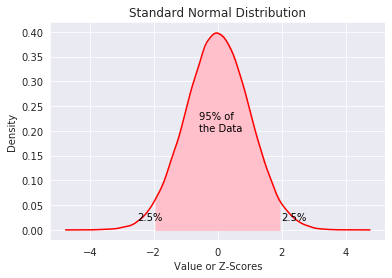

In [40]:
# we want to get central 95% of the normally distributed data
# quantile of level X is a cut point in a distribution for 
# which X% of the data are located on the left side of this point 
# so it's 0.95 + ((1 - 0.95)/2) = 0.975

Sample = stats.norm.rvs(loc=0, scale=1, size=100000)

q1 = stats.norm.ppf(0.975) # 1.959964
q2 = stats.norm.ppf(0.025) #  -1.959964

sns.kdeplot(Sample, color='red') # Plot density 
sns.set_style('darkgrid'); # Change grid background
plt.xlabel('Value or Z-Scores') # x-axis label 
plt.ylabel('Density') # y-axis label 
plt.title('Standard Normal Distribution'); # Plot title

plt.fill_between(x,y, where = (x >= q2) & (x<= q1), color='pink')
plt.text(-0.6,0.2,'95% of\nthe Data', color="black")
plt.text(-2.5, 0.02,'2.5%', color="black")
plt.text(2, 0.02,'2.5%', color="black");

# 95% of the data is in the shaded pink area. 

In [41]:
# Generate data from a normal distribution 

np.random.seed(125)
Sample = stats.norm.rvs(loc=0, scale=1, size=100)

mean = Sample.mean() 
SE = Sample.std()/math.sqrt(100)
Z095 = stats.norm.ppf(0.975, loc=0, scale=1)

CI = [mean - Z095*SE, mean + Z095*SE]
CI

# If we want to estimate 70% confidence interval, 
# we just need to substitute the formula with the appropriate 
# Z-score (Z070). But this method is not widely used in real life. 
# If we don’t know the population mean, then how would we know the 
# population standard deviation?

[-0.21635599714851705, 0.1742445979829022]

#### 2) Confidence interval based on T-score

This interval is used in a more relatistic scenario as you don't need to know SE = σ/sqrt(n).
There are a number of scenarios where you can use a t-interval when, mainly when σ is not known.

For 95% confidence interval formula is similar to Z-interval:

**(M - T0.95 * SE, M + T0.95 * SE)**

In [42]:
# Generate data from a normal distribution 
stats.t.interval(0.95, len(Sample)-1, loc=np.mean(Sample), scale=stats.sem(Sample))

(-0.21976874178240743, 0.17765734261679259)

Let's talk a bit about an interpretation of confidence interval. The name of the interval sounds always misleading. Basically, it means that 95% of all confidence intervals for sample means (infinite number of samples should be drawn!) would include the mean of population. In other words, the confidence level represents the frequency (the proportion) of possible confidence intervals that contain the true value of the unknown population parameter. For 95% CI this proportion is 0.95. To better understand it visually, you can use this link: https://istats.shinyapps.io/ExploreCoverage/

Remember to use the correct units. E.g. if you data were in inches, you should say that 95% confidence interval for the population mean is (....... inches, ....... inches).